## Chap03) Classification
## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = np.array([6,8,12,15,20])
y = np.array([7,11,13,20.5, 19.3])

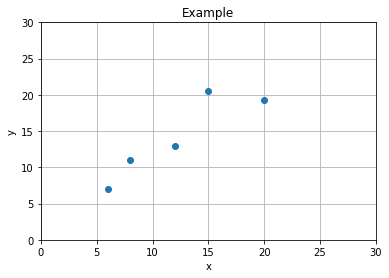

In [3]:
plt.figure()
plt.plot(x, y, 'o')
plt.title('Example')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, 30, 0, 30])
plt.grid()

## 1)Dataset

#### -데이터 분석에 사용할 데이터를 Scikit learn으로부터 불러온다  
Breast_cancer Dataset  
Malignant(악성), Benign(양성)  
Dataset info LINK : https://scikit-learn.org/stable/datasets/index.html

#### -위스콘신대 유방암 진단 데이터(WDBC)
- class   : 2
- 샘플수 : 569개
- Feature : 32개 (ID, 진단결과, 30개의 실측값) 
- Samples per class : 212(M), 357(B)

-유방암 데이터로 악성(M), 양성(B) 판단하는 모델 만들기

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

br_cancer = load_breast_cancer()

br_cancer #dict구조

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
print(br_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
br_cancer.data.shape #(sample,feature)

(569, 30)

In [10]:
x=pd.DataFrame(br_cancer.data)
y=pd.Series(br_cancer.target)

x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2100)

In [16]:
print(x_train.shape)
print(x_test.shape)

(398, 30)
(171, 30)


## 2) Model

#### - Scikit learn 에서 제공하는 Logistic Regression 라이브러리를 가지고 와서 모델로 사용한다

In [18]:
from sklearn.linear_model import LogisticRegression 

model= LogisticRegression(solver='lbfgs').fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [24]:
print(model.coef_)
print(model.coef_.shape)
print(model.intercept_)


[[ 0.93792185  0.59922897  0.1590579  -0.00666655 -0.03457095 -0.16542708
  -0.23596764 -0.09968181 -0.0524075  -0.00995499  0.0434696   0.38774582
   0.26992125 -0.13798874 -0.00290463 -0.03170813 -0.04721497 -0.01348421
  -0.00934749 -0.00337037  1.02335879 -0.55772875 -0.15966539 -0.02070329
  -0.06607003 -0.49419684 -0.63830145 -0.19931916 -0.13372743 -0.04605197]]
(1, 30)
[0.16698056]


In [22]:
print('Train Accuracy : ', model.score(x_train,y_train))
print('Test Accuracy : ', model.score(x_test,y_test) )

Train Accuracy :  0.9447236180904522
Test Accuracy :  0.9415204678362573


## 3) Hyperparameter조정  
 -C: 정규화 규제 조절 상수 
 -solver: 최적화에 사용할 알고리즘 결정  
 -max_iter: 최적화가 수렴하게 만드는 최대 반복 횟수 값   (default=100)  
 -penalty: L1, L2 제약 조건 설정  

### -C값 조절 (&max_iter)

In [23]:
#C값이 낮으면 규제화가 강해진다.

model1 = LogisticRegression(C=0.01 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model2 = LogisticRegression(C=0.1 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model3 = LogisticRegression(C=1.0 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model4 = LogisticRegression(C=10.0 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model5 = LogisticRegression(C=100.0 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', model1.score(x_train, y_train))
print('Train Accuracy : ', model2.score(x_train, y_train))
print('Train Accuracy : ', model3.score(x_train, y_train))
print('Train Accuracy : ', model4.score(x_train, y_train))
print('Train Accuracy : ', model5.score(x_train, y_train))

Train Accuracy :  0.9447236180904522
Train Accuracy :  0.9472361809045227
Train Accuracy :  0.9547738693467337
Train Accuracy :  0.9698492462311558
Train Accuracy :  0.9723618090452262


In [26]:
#규제화가 약해질수록 성능이 좋아진다.
print('Test Accuracy : ', model1.score(x_test, y_test))
print('Test Accuracy : ', model2.score(x_test, y_test))
print('Test Accuracy : ', model3.score(x_test,y_test))
print('Test Accuracy : ', model4.score(x_test, y_test))
print('Test Accuracy : ', model5.score(x_test, y_test))

Test Accuracy :  0.9415204678362573
Test Accuracy :  0.9473684210526315
Test Accuracy :  0.9415204678362573
Test Accuracy :  0.9532163742690059
Test Accuracy :  0.9649122807017544


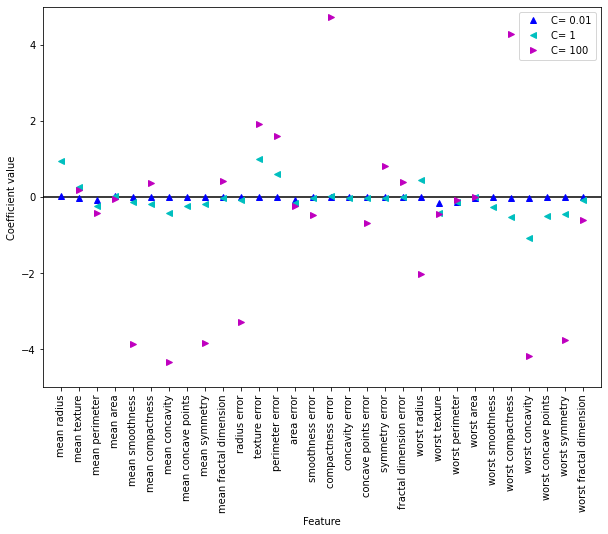

In [27]:
from matplotlib import pyplot as plt

plt.figure(figsize= (10,7))  #figsize 그래프 크기 조절

plt.plot(model1.coef_.T, '^b', label="C= 0.01") 
plt.plot(model3.coef_.T, '<c', label="C= 1")
plt.plot(model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(br_cancer.data.shape[1]), br_cancer.feature_names, rotation=90) # X축 범주 넣기

xlims = plt.xlim(-1,30)
plt.hlines(0, -1, 30) # 수평선 긋기  hlines(y값, x최소값, x최대값)
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

### -L2 정규화 적용

In [33]:
l2_model1 = LogisticRegression(penalty= 'l2' ,C=0.01, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model2 = LogisticRegression(penalty= 'l2' ,C=0.1 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model3 = LogisticRegression(penalty= 'l2' ,C=1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model4 = LogisticRegression(penalty= 'l2' ,C=10 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model5 = LogisticRegression(penalty= 'l2' ,C=100 , solver='lbfgs', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', l2_model1.score(x_train, y_train))
print('Train Accuracy : ', l2_model2.score(x_train, y_train))
print('Train Accuracy : ', l2_model3.score(x_train, y_train))
print('Train Accuracy : ', l2_model4.score(x_train, y_train))
print('Train Accuracy : ', l2_model5.score(x_train, y_train))

Train Accuracy :  0.9447236180904522
Train Accuracy :  0.9472361809045227
Train Accuracy :  0.9547738693467337
Train Accuracy :  0.9698492462311558
Train Accuracy :  0.9723618090452262


In [39]:
l2_model1 = LogisticRegression(penalty= 'l2' ,C=0.01, solver='lbfgs', max_iter=5000).fit(x_test, y_test)
l2_model2 = LogisticRegression(penalty= 'l2' ,C=0.1 , solver='lbfgs', max_iter=5000).fit(x_test, y_test)
l2_model3 = LogisticRegression(penalty= 'l2' ,C=1, solver='lbfgs', max_iter=5000).fit(x_test, y_test)
l2_model4 = LogisticRegression(penalty= 'l2' ,C=10 , solver='lbfgs', max_iter=5000).fit(x_test, y_test)
l2_model5 = LogisticRegression(penalty= 'l2' ,C=100 , solver='lbfgs', max_iter=5000).fit(x_test, y_test)

print('Test Accuracy : ', l2_model1.score(x_test, y_test))
print('Test Accuracy : ', l2_model2.score(x_test, y_test))
print('Test Accuracy : ', l2_model3.score(x_test, y_test))
print('Test Accuracy : ', l2_model4.score(x_test, y_test))
print('Test Accuracy : ', l2_model5.score(x_test, y_test))

Test Accuracy :  0.9590643274853801
Test Accuracy :  0.9707602339181286
Test Accuracy :  0.9766081871345029
Test Accuracy :  0.9824561403508771
Test Accuracy :  0.9824561403508771


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


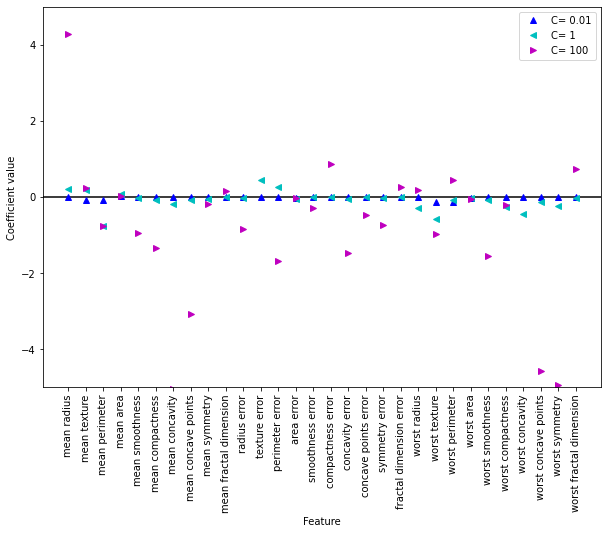

In [40]:
plt.figure(figsize= (10,7))

plt.plot(l2_model1.coef_.T, '^b', label="C= 0.01")
plt.plot(l2_model3.coef_.T, '<c', label="C= 1")
plt.plot(l2_model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(br_cancer.data.shape[1]), br_cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

### L1 정규화 적용

In [38]:
l1_model1 = LogisticRegression(penalty= 'l1' ,C=0.01, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model2 = LogisticRegression(penalty= 'l1' ,C=0.1, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model3 = LogisticRegression(penalty= 'l1' ,C=1, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model4 = LogisticRegression(penalty= 'l1' ,C=10, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model5 = LogisticRegression(penalty= 'l1' ,C=100, solver='liblinear', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', l1_model1.score(x_train, y_train))
print('Train Accuracy : ', l1_model2.score(x_train, y_train))
print('Train Accuracy : ', l1_model3.score(x_train, y_train))
print('Train Accuracy : ', l1_model4.score(x_train, y_train))
print('Train Accuracy : ', l1_model5.score(x_train, y_train))

Train Accuracy :  0.9246231155778895
Train Accuracy :  0.9371859296482412
Train Accuracy :  0.957286432160804
Train Accuracy :  0.9773869346733668
Train Accuracy :  0.992462311557789


In [41]:
l1_model1 = LogisticRegression(penalty= 'l1' ,C=0.01, solver='liblinear', max_iter=5000).fit(x_test, y_test)
l1_model2 = LogisticRegression(penalty= 'l1' ,C=0.1, solver='liblinear', max_iter=5000).fit(x_test, y_test)
l1_model3 = LogisticRegression(penalty= 'l1' ,C=1, solver='liblinear', max_iter=5000).fit(x_test, y_test)
l1_model4 = LogisticRegression(penalty= 'l1' ,C=10, solver='liblinear', max_iter=5000).fit(x_test, y_test)
l1_model5 = LogisticRegression(penalty= 'l1' ,C=100, solver='liblinear', max_iter=5000).fit(x_test, y_test)

print('Test Accuracy : ', l1_model1.score(x_test, y_test))
print('Test Accuracy : ', l1_model2.score(x_test, y_test))
print('Test Accuracy : ', l1_model3.score(x_test, y_test))
print('Test Accuracy : ', l1_model4.score(x_test, y_test))
print('Test Accuracy : ', l1_model5.score(x_test, y_test))

Test Accuracy :  0.9181286549707602
Test Accuracy :  0.9415204678362573
Test Accuracy :  0.9707602339181286
Test Accuracy :  0.9824561403508771
Test Accuracy :  1.0


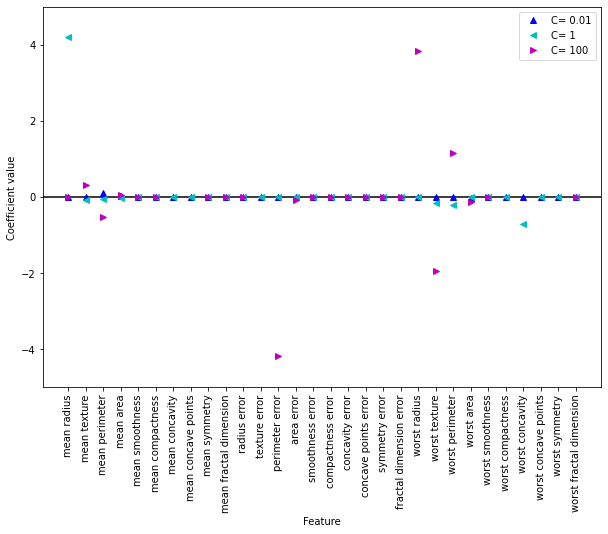

In [42]:
plt.figure(figsize= (10,7))

plt.plot(l1_model1.coef_.T, '^b', label="C= 0.01")
plt.plot(l1_model3.coef_.T, '<c', label="C= 1")
plt.plot(l1_model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(br_cancer.data.shape[1]), br_cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()